In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
%matplotlib inline

# Data visualisation

In [2]:
img_id = random.randint(0, 2000)
img_id

857

## Stereo images

In [3]:
r_img_path = '../data/blender_v3/crop/right_' + str(img_id) + '.png'
l_img_path = '../data/blender_v3/crop/left_' + str(img_id) + '.png'
r_img = cv2.imread(r_img_path)
l_img = cv2.imread(l_img_path)

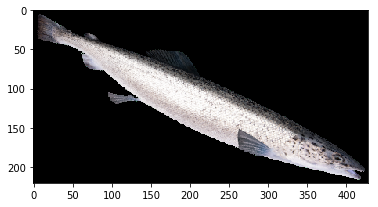

In [4]:
plt.imshow(r_img)

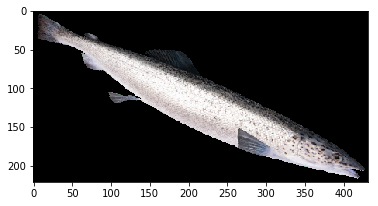

In [5]:
plt.imshow(l_img)

## Depth map

In [6]:
dmap_path = '../data/blender_v3/depth_map/depth_map_' + str(img_id) + '.npy'
dmap = np.load(dmap_path)

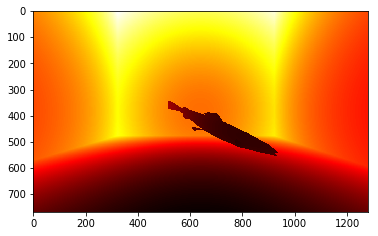

In [7]:
plt.imshow(dmap.T, cmap='hot')

## Mask

In [8]:
mask_path = '../data/blender_v3/mask/left_' + str(img_id) + '.npy'
mask = np.load(mask_path)

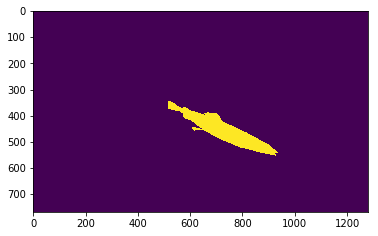

In [9]:
plt.imshow(mask)

## 1 - Angle extractor

In [10]:
def get_bb_from_mask(mask):
    """
    Computes the bounding box coordinates from the mask
    
    Input:
        - mask : np.array of size (L, H)
    
    Output:
        - (x1, x2, y1, y2) : coordinates of the corner of
        the bounding box
    """
    x_end, x_start = np.where(mask == 1)[0].max(), np.where(mask == 1)[0].min()
    y_end, y_start = np.where(mask == 1)[1].max(), np.where(mask == 1)[1].min()
    
    return (x_start, x_end, y_start, y_end)    

In [11]:
x_start, x_end, y_start, y_end = get_bb_from_mask(mask)
x_start, x_end, y_start, y_end

(342, 553, 514, 936)

In [12]:
H = x_end - x_start
L = y_end - y_start
H, L

(211, 422)

In [13]:
# Hyperparameter 1 
width_ratio = 0.1
width_bb = int(L * width_ratio)
width_bb

42

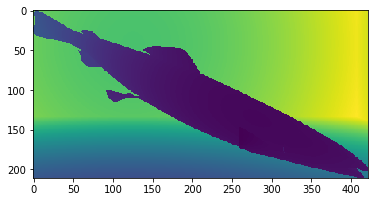

In [14]:
# Bb from the mask
plt.imshow(dmap.T[x_start:x_end, y_start:y_end])

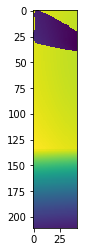

In [15]:
plt.imshow(dmap.T[x_start:x_end, y_start:(y_start + width_bb)])

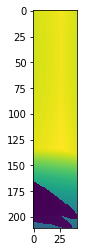

In [16]:
plt.imshow(dmap.T[x_start:x_end, (y_end - width_bb):y_end])

In [17]:
def get_extremities_depth_delta(dmap, mask, width_ratio=0.1):
    """
    Computes the difference of depth between 
    
    Input:
        - dmap : np.array (H, L) depth map
        - mask : np.array (L, H) mask
        - width ratio: portion of the mask bounding box to 
        crop the tail & head
    
    Output:
        - delta : float, difference of depth between the depth 
        map croppend on tail & head
    """
    width_bb = int(L * width_ratio)
    x_start, x_end, y_start, y_end = get_bb_from_mask(mask)
    mean_ex1 = dmap.T[np.where(mask[x_start:x_end,
               y_start:(y_start + width_bb)] == 1)].mean()
    mean_ex2 = dmap.T[np.where(mask[x_start:x_end, 
             (y_end - width_bb):y_end])].mean()
    
    return abs(mean_ex1 - mean_ex2)

In [19]:
delta = get_extremities_depth_delta(dmap, mask, width_ratio=0.1)
delta

1.155975155962345